# Waffle Charts, Word Clouds, and Regression Plots

## Downloading and Prepping Data

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [2]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace = True)

df_can.columns = list(map(str,df_can.columns))

df_can = df_can.set_index('Country')

df_can['Total'] = df_can.sum(axis = 1)

years = list(map(str,range(1980,2014)))


<ipython-input-4-fddaa26a1460>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


In [5]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Visualizing Data using Matplotlib

In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


## Waffle Charts

A waffle chart is an interesting visualization that is normally created to display progress toward goals.

Let's revisit the previous case study about Denmark, Norway, and Sweden.

In [7]:
df_dsn = df_can.loc[['Denmark','Norway','Sweden'],:]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total

In [8]:
total_values = sum(df_dsn['Total'])
category_proportion = [(float(value)/total_values) for value in df_dsn['Total']]

for i,value in enumerate(category_proportion):
  print(df_dsn.index.values[i],value)

Denmark 0.32255663965602777
Norway 0.1924094592359848
Sweden 0.48503390110798744


Step 2. The second step is defining the overall size of the waffle chart.

In [9]:
width = 40
height = 10

total_num_titles = width * height

Step 3. The third step is using the proportion of each category to determe it respective number of tiles

In [10]:
#compute the number of title of each category
title_per_category = [round(propor * total_num_titles) for propor in category_proportion]

title_per_category

[129, 77, 194]

Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.

In [11]:
#initialize an empty matrix
waffle_chart = np.zeros((height,width))

category_index = 0
title_index = 0

for col in range(width):
  for row in range(height):
    title_index += 1

    if(title_index> sum(title_per_category[0:title_index])): category_index += 1

    waffle_chart[row,col] = title_index
print('waffle chart populated')

waffle chart populated


In [44]:
waffle_chart

array([[  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91., 101.,
        111., 121., 131., 141., 151., 161., 171., 181., 191., 201., 211.,
        221., 231., 241., 251., 261., 271., 281., 291., 301., 311., 321.,
        331., 341., 351., 361., 371., 381., 391.],
       [  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92., 102.,
        112., 122., 132., 142., 152., 162., 172., 182., 192., 202., 212.,
        222., 232., 242., 252., 262., 272., 282., 292., 302., 312., 322.,
        332., 342., 352., 362., 372., 382., 392.],
       [  3.,  13.,  23.,  33.,  43.,  53.,  63.,  73.,  83.,  93., 103.,
        113., 123., 133., 143., 153., 163., 173., 183., 193., 203., 213.,
        223., 233., 243., 253., 263., 273., 283., 293., 303., 313., 323.,
        333., 343., 353., 363., 373., 383., 393.],
       [  4.,  14.,  24.,  34.,  44.,  54.,  64.,  74.,  84.,  94., 104.,
        114., 124., 134., 144., 154., 164., 174., 184., 194., 204., 214.,
        224., 234., 244., 254., 2

Step 5. Map the waffle chart matrix into a visual.

<Figure size 640x480 with 0 Axes>

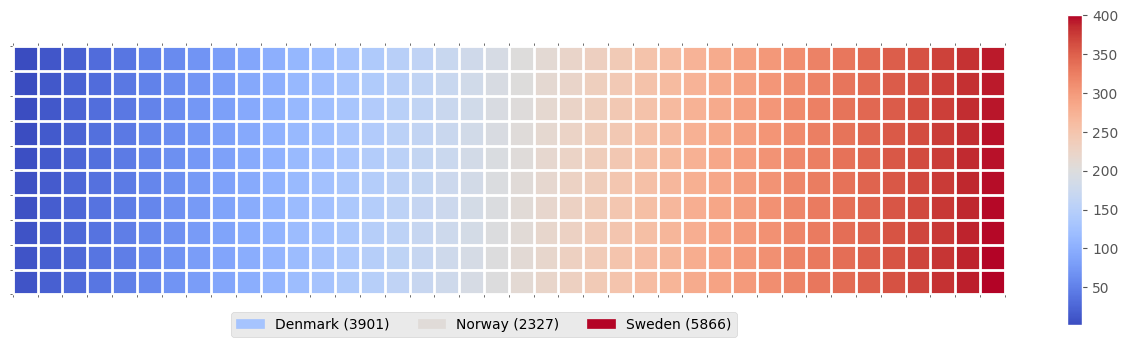

In [13]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

## Word Clouds

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

In [14]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [15]:
# download file and save as alice_novel.txt
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()

print ('File downloaded and saved!')

File downloaded and saved!


In [17]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [20]:
# tao doi tuong word cloud
alice_wc = WordCloud(
    background_color = 'white',
    max_words= 2000,
    stopwords= stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)


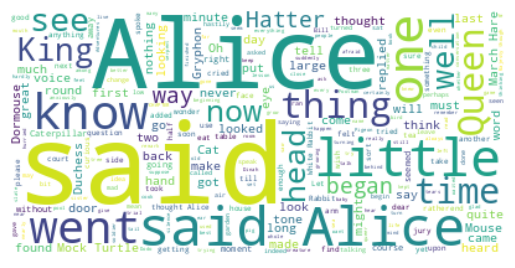

In [23]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png

# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


Shaping the word cloud according to the mask is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words in the novel.

(-0.5, 899.5, 899.5, -0.5)

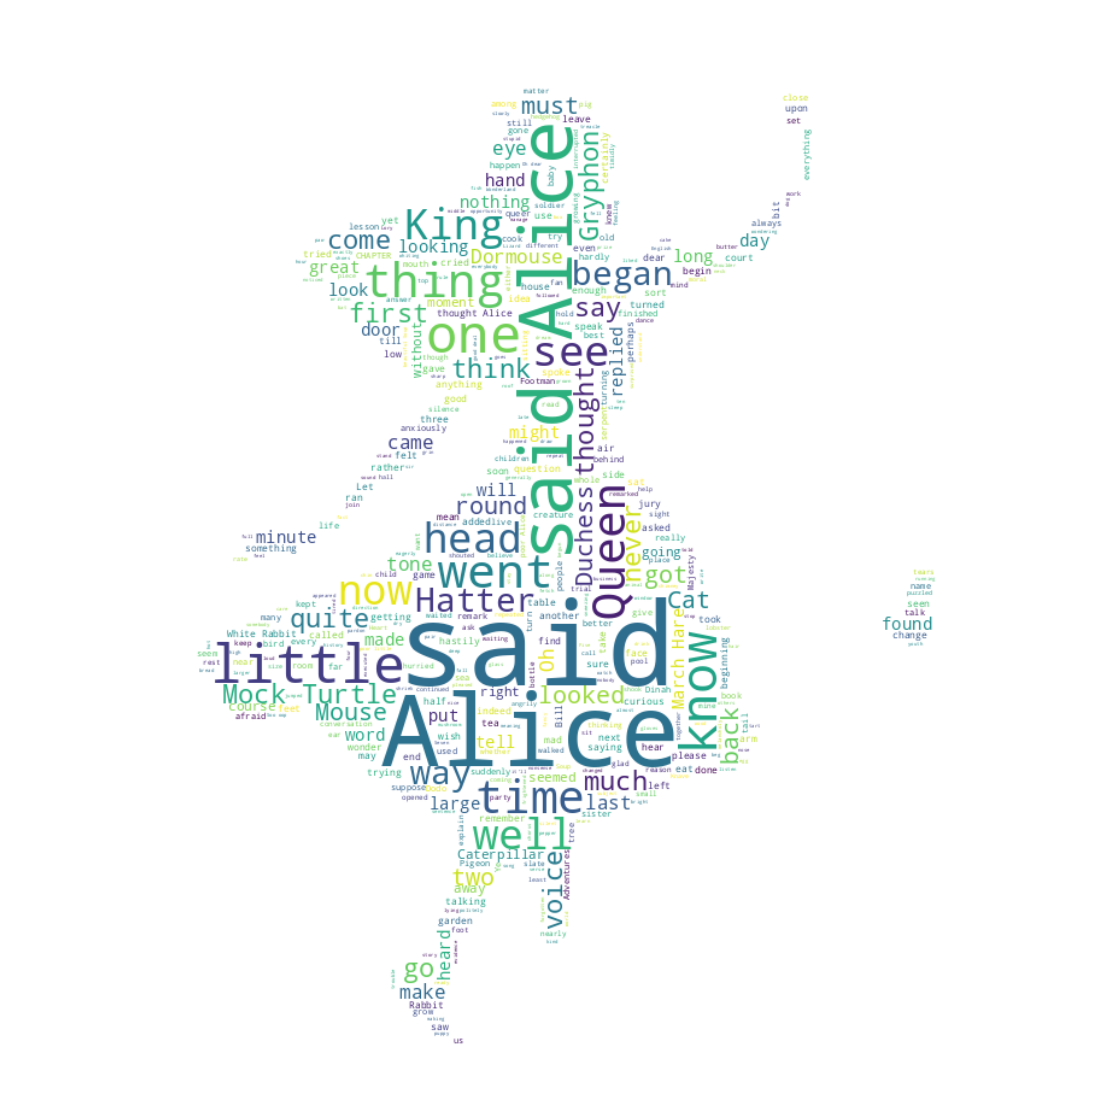

In [28]:
alice_wc = WordCloud(background_color = 'white',max_words = 2000, mask =alice_mask, stopwords = stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear' )
plt.axis('off')

## Regression Plots

In [29]:
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

In [38]:
df_tot = pd.DataFrame(df_can[years].sum(axis = 0))
df_tot.index = map(float,df_tot.index)

df_tot.reset_index(inplace = True)

df_tot.columns = ['year','total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


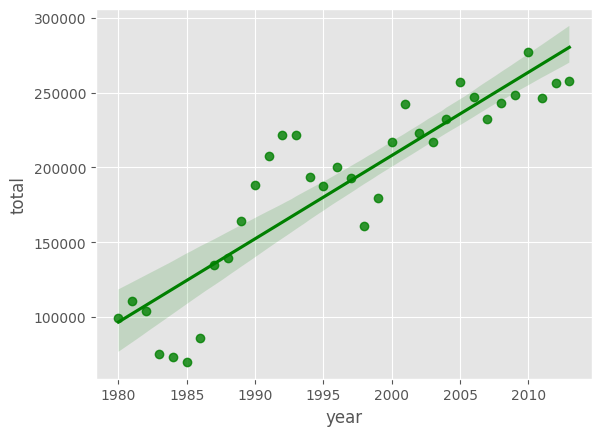

In [39]:
ax = sns.regplot(x = 'year',y = 'total',data = df_tot,color = 'green')

Text(0.5, 1.0, 'Number of immigration to Canada in 1980 - 2013')

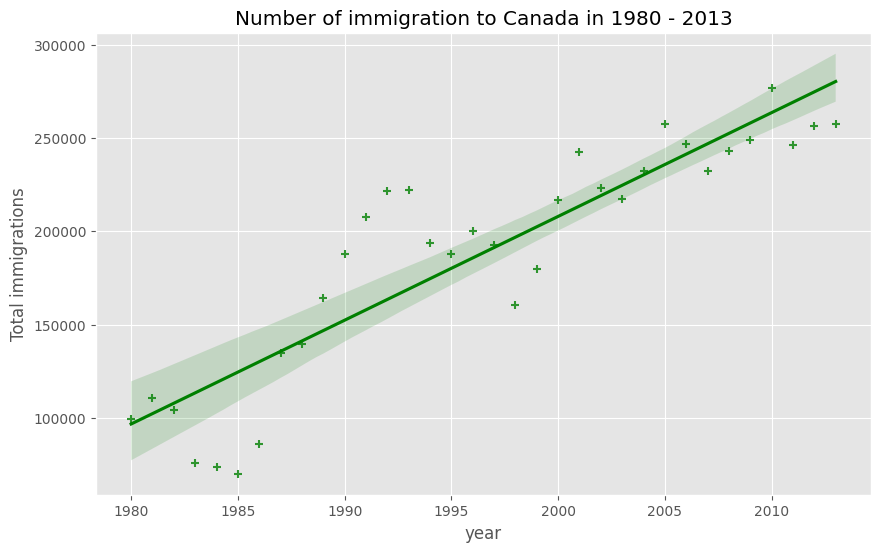

In [43]:
plt.figure(figsize = (10,6))
ax = sns.regplot(x = 'year',y = 'total',data = df_tot,color = 'green',marker = '+')

ax.set(ylabel = 'Total immigrations')
ax.set_title('Number of immigration to Canada in 1980 - 2013')


Text(0.5, 1.0, 'Number of immigration to Canada in 1980 - 2013')

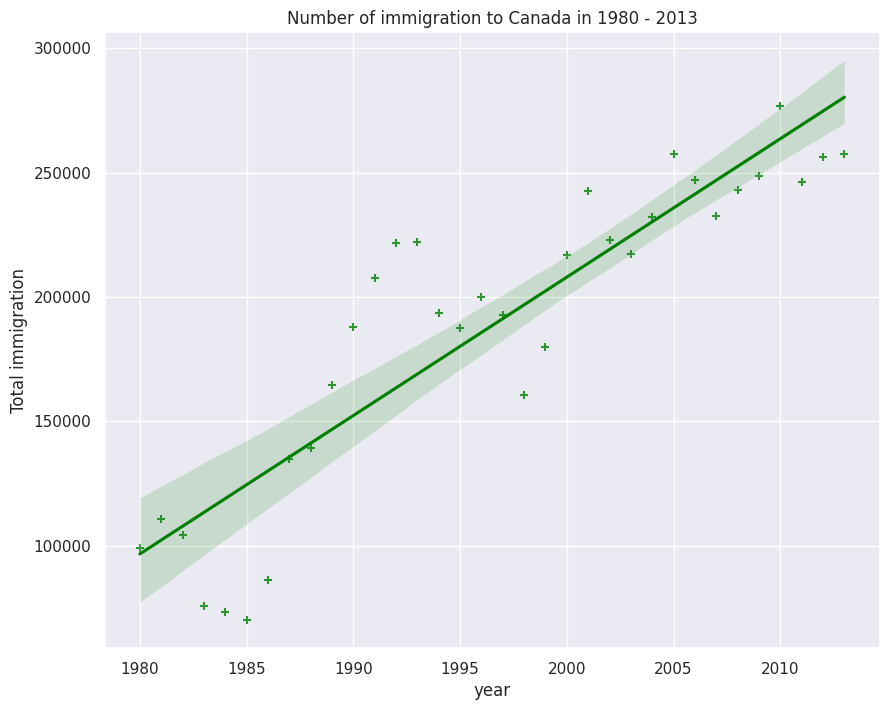

In [53]:
plt.figure(figsize = (10,8))

sns.set_style('whitegrid')
sns.set(font_scale = 1)
ax = sns.regplot(x = 'year',y = 'total',data = df_tot, color = 'green',marker = '+')

ax.set(ylabel= 'Total immigration')
ax.set_title('Number of immigration to Canada in 1980 - 2013')

Question: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.


In [58]:
df_dsn = pd.DataFrame(df_can.loc[['Denmark','Sweden','Norway'],years].sum(axis = 0))
df_dsn.index = map(int,df_dsn.index)

df_dsn = df_dsn.reset_index()
df_dsn.columns = ['year','total']
df_dsn

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


[Text(0, 0.5, 'Total immigrants from Denmark,Norway,Sweden')]

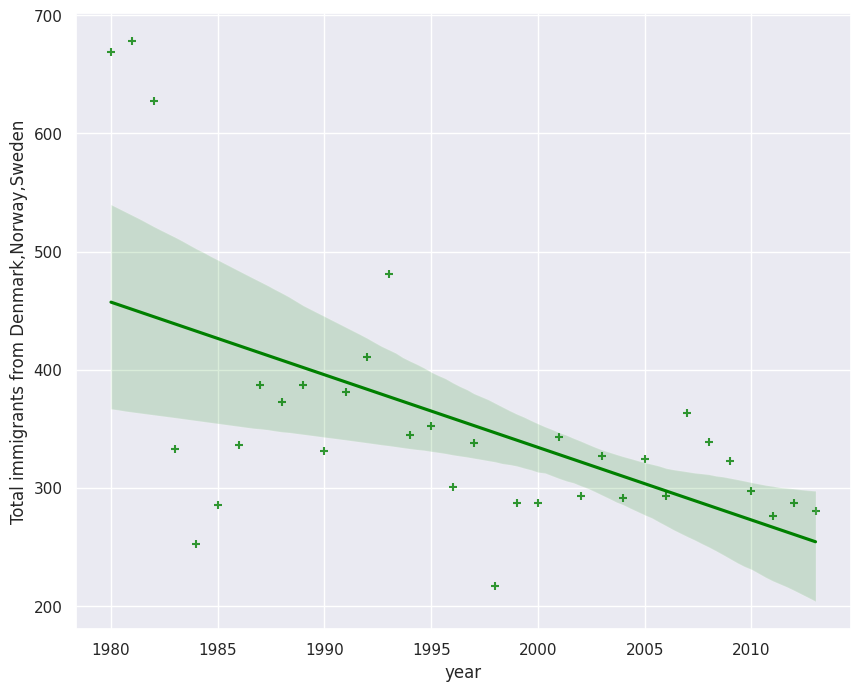

In [61]:
plt.figure(figsize = (10,8))

sns.set_style('whitegrid')
sns.set(font_scale = 1)

ax = sns.regplot(x = 'year',y='total',marker = '+',color = 'green',data = df_dsn)
ax.set(ylabel = 'Total immigrants from Denmark,Norway,Sweden')